In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython
import imageio
import os

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [14]:
t_max = 500
dt = .01
lam = 0.1931833275037836
N = 48

In [31]:
def init(N):
    r0 = np.random.uniform(-.1, .1, size=(N,3))
    
    p0 = np.zeros([N, 3])
    p0[0] = np.array([1/2., 0, 0])
    p0[-1] = -p0[0]
    
    return r0, p0

In [32]:
def calc_energy(r, p, K=1, rmax=1):
    
    T = .5 * np.linalg.norm(p)**2
    
    V = (.5 * K * rmax * np.log(1 - np.linalg.norm(r[1:]-r[:-1], axis=1)**2 / rmax**2)).sum()
        
    return T + V

In [ ]:
r0, p0 = init(N=N)

In [ ]:
R, P, t = a.velocity_verlet_Ndim(r0.copy(), p0.copy(), t_max, dt, f.FENE_force)

In [ ]:
plt.plot(R[:,0,0])

In [ ]:
E = np.zeros(len(t))
for i in tqdm(range(len(t))):
    E[i] = calc_energy(R[i], R[i])

In [ ]:
plt.plot(t, E)

In [ ]:
def radius_of_gyration(r):
    
    r_cm = r.sum(axis=0) / len(r)
    
    Rg2 = (np.linalg.norm(r - r_cm, axis=1)**2).sum() / len(r)
    
    return Rg2

In [ ]:
def end2end_distance(r):
    return np.linalg.norm(r[-1] - r[0])**2

In [ ]:
Rg2 = np.zeros(len(t))
for i in tqdm(range(len(t))):
    Rg2[i] = radius_of_gyration(R[i])

In [ ]:
np.sqrt(Rg2.mean())

In [ ]:
Re2 = np.zeros(len(t))
for i in tqdm(range(len(t))):
    Re2[i] = end2end_distance(R[i])

In [ ]:
np.sqrt(Re2.mean())

In [ ]:
plt.plot(Rg2)

In [ ]:
plt.plot(Re2)

In [ ]:
T = 0.1
kb = 1.380649e-23
cv = ((E-E[0])**2).mean() / (N * T**2)
print(cv)

In [33]:
rmax = 1.
L = N*rmax / 3.

In [34]:
r0, p0 = init(N=N)

In [35]:
R2, P2, t2 = a.velocity_verlet_Ndim(r0.copy(), p0.copy(), t_max, dt, f.FENE_force,
                                    periodic={'PBC': True, 'box_size': L, 'closed': True})

100%|██████████| 49999/49999 [01:57<00:00, 425.04it/s]


In [36]:
r_single = R2[:,0,:]
dr2 = np.linalg.norm(r_single[:] - r_single[0], axis=1)**2

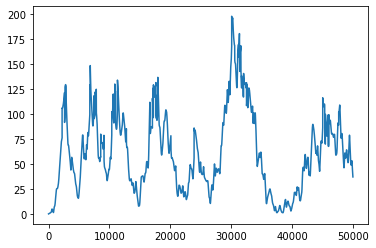

In [37]:
plt.plot(dr2)

In [22]:
gamma = .2

In [23]:
R2_lg, P2_lg, t2_lg = a.leimkuhler_matthews_BAOAB(r0.copy(), p0.copy(), t_max, dt, f.FENE_force, gamma,
                                                  periodic={'PBC': True, 'box_size': L, 'closed': True})

100%|██████████| 49999/49999 [02:03<00:00, 403.66it/s]


In [24]:
r_single_lg = R2_lg[:,0,:]
dr2_lg = np.linalg.norm(r_single_lg[:] - r_single_lg[0], axis=1)**2

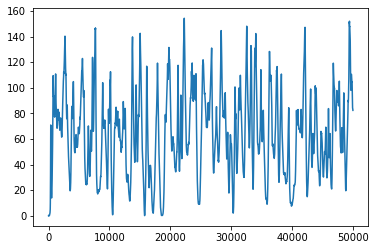

In [30]:
plt.plot(dr2_lg)